In [510]:
##Path() → current directory
##.resolve() → converts to absolute path
##.parent → goes one folder up

from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parent
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "raw.csv"

df = pd.read_csv(DATA_PATH)

In [511]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 79335 entries, 0 to 79334
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         79335 non-null  int64  
 1   NEIGHBORHOOD                    79335 non-null  str    
 2   BUILDING CLASS CATEGORY         79335 non-null  str    
 3   TAX CLASS AT PRESENT            79335 non-null  str    
 4   BLOCK                           79335 non-null  int64  
 5   LOT                             79335 non-null  str    
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       79335 non-null  str    
 8   ADDRESS                         79335 non-null  str    
 9   APARTMENT NUMBER                19385 non-null  str    
 10  ZIP CODE                        79317 non-null  float64
 11  RESIDENTIAL UNITS               59451 non-null  float64
 12  COMMERCIAL UNITS                45831 non-n

In [512]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace(r'\$', '', regex=True).str.replace(',','', regex=False)

# Step 2: Convert the string to a float
df['SALE PRICE'] = df['SALE PRICE'].astype(float)

In [513]:
df.loc[df['SALE PRICE'] < 150000.0, 'SALE PRICE']

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
79324    0.0
79327    0.0
79330    0.0
79331    0.0
79333    0.0
Name: SALE PRICE, Length: 29225, dtype: float64

In [514]:
df.loc[df['SALE PRICE'] > 150000000.0, 'SALE PRICE']

970      168618594.0
973      205000000.0
974      205000000.0
1299     243500000.0
1796     260000000.0
            ...     
13303    510000000.0
38349    164000000.0
39550    160000000.0
39552    160000000.0
39554    160000000.0
Name: SALE PRICE, Length: 328, dtype: float64

Text(0.5, 1.0, 'Top 10 Categories with $0 Sale Price')

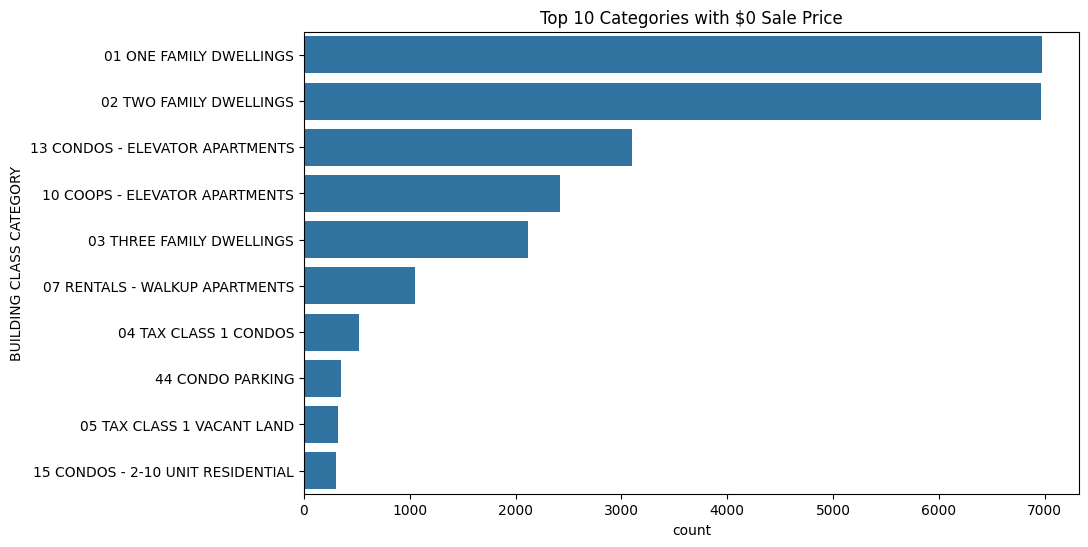

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if $0 sales are concentrated in specific building classes
zeros = df[df['SALE PRICE'] == 0]
plt.figure(figsize=(10,6))
sns.countplot(data=zeros, y='BUILDING CLASS CATEGORY', order=zeros['BUILDING CLASS CATEGORY'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories with $0 Sale Price')

Text(0.5, 1.0, 'Top 10 Categories with outlier Sale Price')

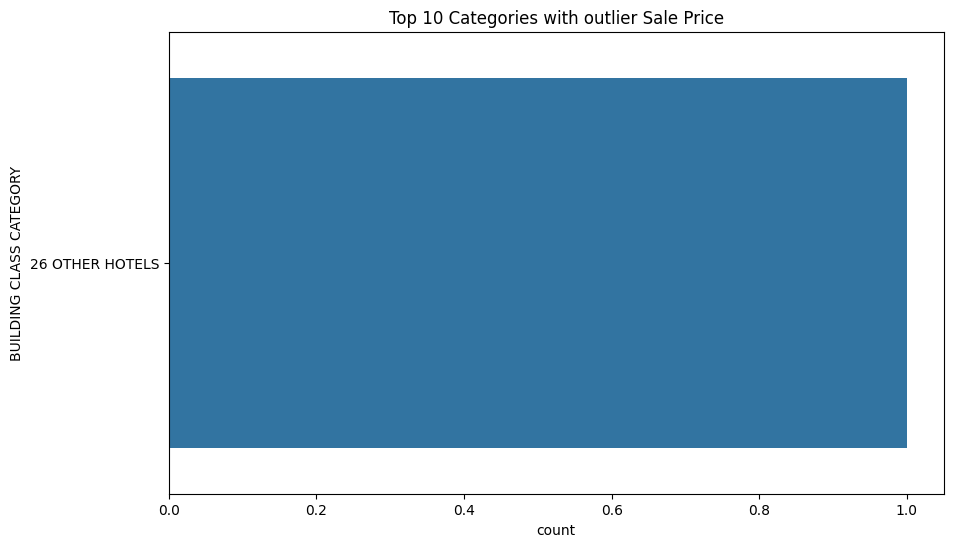

In [516]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if $0 sales are concentrated in specific building classes
zeros = df[df['SALE PRICE'] == 100000000.0]
plt.figure(figsize=(10,6))
sns.countplot(data=zeros, y='BUILDING CLASS CATEGORY', order=zeros['BUILDING CLASS CATEGORY'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories with outlier Sale Price')

Text(0.5, 1.0, 'Sale Price Distribution (With Outliers)')

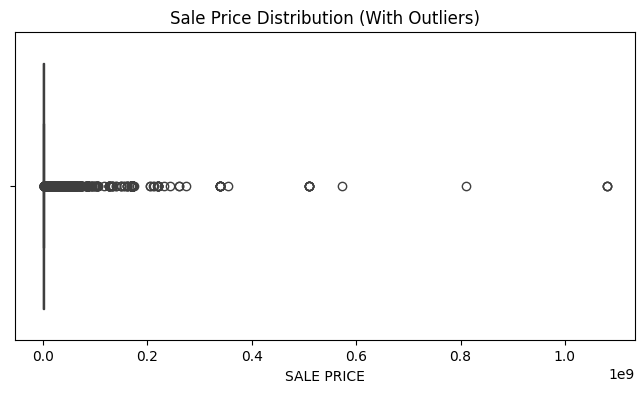

In [517]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['SALE PRICE'])
plt.title('Sale Price Distribution (With Outliers)')
# Note: This will likely look like a single line because the $260M sales squash the rest!

In [518]:
# Create a focused dataset for residential analysis
# Removing 0s and extreme commercial outliers (e.g., > $10M)
df_market = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)].copy()

Data Note: While statistical outliers exist above $3M, these represent legitimate high-end residential sales. I have chosen to retain these up to $10M to ensure the luxury market is represented in the final dashboard, while excluding extreme commercial 'noise' over $10M.

Text(0.5, 1.0, 'Log-Scaled Sale Price Distribution')

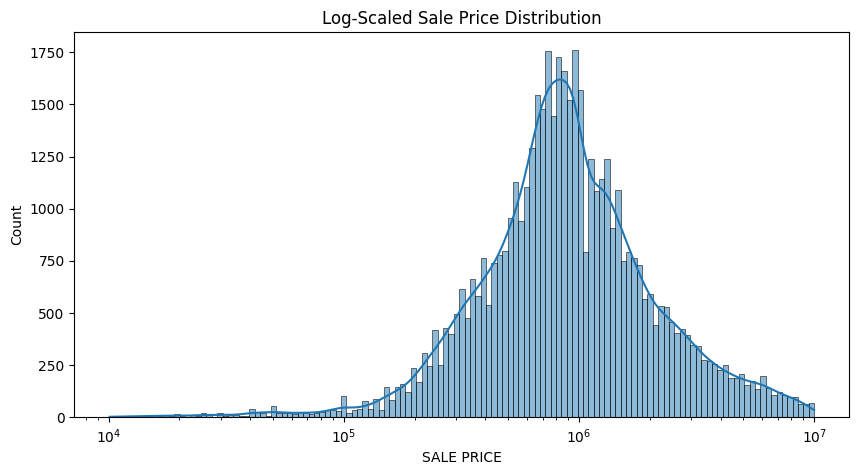

In [519]:
plt.figure(figsize=(10, 5))
sns.histplot(df_market['SALE PRICE'], kde=True, log_scale=True)
plt.title('Log-Scaled Sale Price Distribution')

In [520]:
df_market['SALE DATE']

3        12/17/2025
7        04/29/2025
8        11/20/2025
9        03/13/2025
11       08/07/2025
            ...    
79326    09/08/2025
79328    09/16/2025
79329    10/22/2025
79332    09/12/2025
79334    02/05/2025
Name: SALE DATE, Length: 49375, dtype: str

In [521]:
df_market['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [522]:
# Create new columns for easier analysis
df_market['SALE MONTH'] = df_market['SALE DATE'].dt.month
df_market['SALE YEAR'] = df_market['SALE DATE'].dt.year
df_market['MONTH_YEAR'] = df_market['SALE DATE'].dt.to_period('M').astype(str)

In [523]:
df_market.info()

<class 'pandas.DataFrame'>
Index: 49375 entries, 3 to 79334
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         49375 non-null  int64         
 1   NEIGHBORHOOD                    49375 non-null  str           
 2   BUILDING CLASS CATEGORY         49375 non-null  str           
 3   TAX CLASS AT PRESENT            49375 non-null  str           
 4   BLOCK                           49375 non-null  int64         
 5   LOT                             49375 non-null  str           
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       49375 non-null  str           
 8   ADDRESS                         49375 non-null  str           
 9   APARTMENT NUMBER                13561 non-null  str           
 10  ZIP CODE                        49362 non-null  float64       
 11  RESIDENTIAL UNITS 

In [524]:
# Convert strings to numeric, turning errors (like spaces) into NaNs

df_market['LAND SQUARE FEET'] = df_market['LAND SQUARE FEET'].str.replace(',','', regex=False)
df_market['GROSS SQUARE FEET'] = df_market['GROSS SQUARE FEET'].str.replace(',','', regex=False)

In [525]:
# Step 2: Convert the string to a float
df_market['LAND SQUARE FEET'] = pd.to_numeric(df_market['LAND SQUARE FEET'], 'coerce')
df_market['GROSS SQUARE FEET'] = pd.to_numeric(df_market['GROSS SQUARE FEET'],errors='coerce')

In [526]:
df_market['GROSS SQUARE FEET'].isna().sum()

np.int64(27209)

In [527]:
df_market['LAND SQUARE FEET'].isna().sum()

np.int64(27209)

In [528]:
# Check NaNs specifically for One Family Dwellings
houses = df_market[df_market['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY')]
print(f"Total Houses: {len(houses)}")
print(f"Missing SqFt in Houses: {houses['GROSS SQUARE FEET'].isna().sum()}")

Total Houses: 9473
Missing SqFt in Houses: 74


For a Standalone House (սեփական տուն): This is the total area where you live (living room, bedrooms, kitchen, etc.)

The "Co-op" Problem: For Co-ops and many Condos, the city's database often leaves this blank because the "building" might be 100,000 square feet, but your specific apartment is only 800 square feet. The system doesn't always have a place to put that 800 number in this specific column

When you buy a Co-op, you are buying shares in a corporation that owns the building, not the "dirt" or the specific square footage of the walls

In [529]:
houses = df_market[df_market['BUILDING CLASS CATEGORY'].str.contains('10 COOPS - ELEVATOR APARTMENTS')]
print(f"Total Houses: {len(houses)}")
print(f"Missing SqFt in Houses: {houses['GROSS SQUARE FEET'].isna().sum()}")

Total Houses: 10428
Missing SqFt in Houses: 10428


In [530]:
df_market['BUILDING CLASS CATEGORY'].value_counts()

BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS                10428
01 ONE FAMILY DWELLINGS                        9473
13 CONDOS - ELEVATOR APARTMENTS                9191
02 TWO FAMILY DWELLINGS                        6994
09 COOPS - WALKUP APARTMENTS                   2058
03 THREE FAMILY DWELLINGS                      1931
07 RENTALS - WALKUP APARTMENTS                 1381
15 CONDOS - 2-10 UNIT RESIDENTIAL              1088
17 CONDO COOPS                                  991
44 CONDO PARKING                                972
04 TAX CLASS 1 CONDOS                           942
12 CONDOS - WALKUP APARTMENTS                   669
05 TAX CLASS 1 VACANT LAND                      520
22 STORE BUILDINGS                              443
14 RENTALS - 4-10 UNIT                          289
47 CONDO NON-BUSINESS STORAGE                   281
29 COMMERCIAL GARAGES                           264
43 CONDO OFFICE BUILDINGS                       179
08 RENTALS - ELEVATOR APARTMENTS        

fill the nulls with the median value of that specific neighborhood and building class. This is much more accurate than using a global mean

In [531]:
def categorize_property(row):
    cat = row['BUILDING CLASS CATEGORY']
    if 'FAMILY DWELLINGS' in cat:
        return 'Standalone House'
    elif 'COOPS' in cat or 'CONDOS' in cat or 'CONDO' in cat:
        return 'Apartment/Unit'
    elif 'RENTALS' in cat:
        return 'Rental Building'
    elif 'VACANT LAND' in cat:
        return 'Land'
    else:
        return 'Commercial/Other'

df_market['PROPERTY_GROUP'] = df_market.apply(categorize_property, axis=1)

grouping these 40+ messy categories into 4 or 5 clean "Property Groups," makeing the data searchable and much easier to visualize

<Axes: xlabel='BOROUGH', ylabel='GROSS SQUARE FEET'>

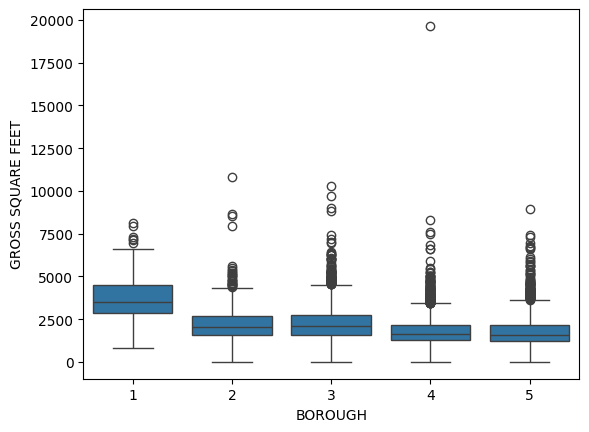

In [532]:
sns.boxplot(data=df_market[df_market['PROPERTY_GROUP'] == 'Standalone House'], x='BOROUGH', y='GROSS SQUARE FEET')

In [533]:

# 1. Fill the 13 missing ones with the most common zip in that neighborhood (or just drop those 13 rows)
df_market = df_market.dropna(subset=['ZIP CODE', 'YEAR BUILT'])

# 2. Convert to integer to remove the '.0' decimal
df_market['ZIP CODE'] = df_market['ZIP CODE'].astype(int)
df_market['YEAR BUILT'] = df_market['YEAR BUILT'].astype(int)

# 3. Convert to string (Object) so Power BI doesn't try to "Sum" the zip codes
df_market['ZIP CODE'] = df_market['ZIP CODE'].astype(str)

# Create a 'General Class' column using the first character
df_market['BUILDING_LETTER_CODE'] = df_market['BUILDING CLASS AT TIME OF SALE'].str[0]


In [534]:
# Create a cleaner Tax Class column
df_market['TAX_CLASS_CLEAN'] = df_market['TAX CLASS AT PRESENT'].str[0]

# Optional: Give them human-readable names for Power BI
tax_names = {
    '1': 'Residential (1-3 Units)',
    '2': 'Residential (Apartments/Condos)',
    '4': 'Commercial/Industrial'
}
df_market['TAX_CLASS_NAME'] = df_market['TAX_CLASS_CLEAN'].map(tax_names)

In [535]:
# Create a mapping dictionary
building_map = {
    'A': 'One-Family House',
    'B': 'Two-Family House',
    'C': 'Walk-up Apartment',
    'D': 'Elevator Apartment',
    'R': 'Condo',
    'S': 'Mixed-Use Residential'
}

# Apply the map, and group everything else as 'Other/Commercial'
df_market['BUILDING_CATEGORY_FINAL'] = df_market['BUILDING_LETTER_CODE'].map(building_map).fillna('Commercial/Other')

In [536]:
# Calculate Price per Square Foot
df_market['PRICE_PER_SQFT'] = df_market['SALE PRICE'] / df_market['GROSS SQUARE FEET']


In [537]:
# Create the mapping dictionary
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

# Map the numbers to a new, readable column
df_market['BOROUGH_NAME'] = df_market['BOROUGH'].map(borough_names)

For a historical market analysis, BUILDING CLASS AT TIME OF SALE is usually more important because it explains the price at the moment the money changed hands

In [538]:
df_market = df_market.drop(columns=['EASE-MENT',
                                    'BUILDING CLASS CATEGORY',
                                    'APARTMENT NUMBER', 
                                    'BUILDING CLASS AT TIME OF SALE',
                                    'BLOCK', 'LOT', 'ADDRESS',
                                    'TAX CLASS AT PRESENT',
                                    'BUILDING CLASS AT PRESENT',
                                    'BUILDING_LETTER_CODE',
                                    'TAX_CLASS_CLEAN',
                                    'BOROUGH'])

In [539]:
# Quick fix for the units before exporting
df_market['TOTAL UNITS'] = df_market['TOTAL UNITS'].fillna(1)

df_market['RESIDENTIAL UNITS'] = df_market['RESIDENTIAL UNITS'].fillna(0)
df_market['COMMERCIAL UNITS'] = df_market['COMMERCIAL UNITS'].fillna(0)

In [540]:
df_market.head()

,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,MONTH_YEAR,PROPERTY_GROUP,TAX_CLASS_NAME,BUILDING_CATEGORY_FINAL,PRICE_PER_SQFT,BOROUGH_NAME
3,ALPHABET CITY,10009,28.0,0.0,28.0,4542.0,18254.0,1900,2,540000.0,2025-12-17,12,2025,2025-12,Rental Building,Residential (Apartments/Condos),Walk-up Apartment,29.582557,Manhattan
7,ALPHABET CITY,10009,18.0,0.0,18.0,2404.0,6875.0,1900,2,280000.0,2025-04-29,4,2025,2025-04,Rental Building,Residential (Apartments/Condos),Walk-up Apartment,40.727273,Manhattan
8,ALPHABET CITY,10009,8.0,3.0,11.0,2364.0,7166.0,1900,2,8800000.0,2025-11-20,11,2025,2025-11,Rental Building,Residential (Apartments/Condos),Walk-up Apartment,1228.021211,Manhattan
9,ALPHABET CITY,10009,8.0,2.0,10.0,1919.0,7810.0,1900,2,2000000.0,2025-03-13,3,2025,2025-03,Rental Building,Residential (Apartments/Condos),Walk-up Apartment,256.081946,Manhattan
11,ALPHABET CITY,10009,10.0,0.0,10.0,2369.0,6990.0,1900,2,4000000.0,2025-08-07,8,2025,2025-08,Rental Building,Residential (Apartments/Condos),Walk-up Apartment,572.246066,Manhattan


In [541]:
df_market.info()

<class 'pandas.DataFrame'>
Index: 46139 entries, 3 to 79334
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   NEIGHBORHOOD               46139 non-null  str           
 1   ZIP CODE                   46139 non-null  str           
 2   RESIDENTIAL UNITS          46139 non-null  float64       
 3   COMMERCIAL UNITS           46139 non-null  float64       
 4   TOTAL UNITS                46139 non-null  float64       
 5   LAND SQUARE FEET           21382 non-null  float64       
 6   GROSS SQUARE FEET          21382 non-null  float64       
 7   YEAR BUILT                 46139 non-null  int64         
 8   TAX CLASS AT TIME OF SALE  46139 non-null  int64         
 9   SALE PRICE                 46139 non-null  float64       
 10  SALE DATE                  46139 non-null  datetime64[us]
 11  SALE MONTH                 46139 non-null  int32         
 12  SALE YEAR           

In [542]:
# Check median price per borough
df_market.groupby('BOROUGH_NAME')['SALE PRICE'].median().sort_values(ascending=False)

BOROUGH_NAME
Manhattan        1170000.0
Brooklyn         1065000.0
Queens            735000.0
Staten Island     715000.0
Bronx             685000.0
Name: SALE PRICE, dtype: float64

In [543]:
CLEAN_PATH = PROJECT_ROOT / "data" / "clean" / "clean.csv"

df_market.to_csv(CLEAN_PATH, index=False)